In [1]:
#First, import files and packages, both the dataset and pandas and numpy
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn.preprocessing as preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

df = pd.read_csv(r"C:\Users\Ian's Second PC\Downloads\train.csv")
df.head()


Bad key text.latex.preview in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# In[2]:
#Capstone EDA
#These are additional statistics and basic analysis, looking into features of the dataset post-wrangling
def first_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Samples: %d,\nFeatures Count: %d,\nDuplicates: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

In [3]:
first_EDA(df)
#Oddly enough, there are a large amount of null values.

Samples: 1460,
Features Count: 81,
Duplicates: 0,
Null Entries: 6965,
Number of Rows with Null Entries: 1460 100.0%


In [4]:
df2 = df.dropna(axis='columns')

In [5]:
first_EDA(df2)
#Null values have been removed, for the sake of determining potential best fit variables for the analysis.

Samples: 1460,
Features Count: 62,
Duplicates: 0,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


In [6]:
df2pricecheck = df2[['SalePrice', 'YrSold']]

In [7]:
Frame06 = df2pricecheck[(df2pricecheck['YrSold']==2006)]  
Frame07 = df2pricecheck[(df2pricecheck['YrSold']==2007)]  
Frame08 = df2pricecheck[(df2pricecheck['YrSold']==2008)]  
Frame09 = df2pricecheck[(df2pricecheck['YrSold']==2009)]  
Frame10 = df2pricecheck[(df2pricecheck['YrSold']==2010)]  
print(Frame06['SalePrice'].mean(), Frame07['SalePrice'].mean() ,Frame08['SalePrice'].mean(), Frame09['SalePrice'].mean(), Frame10['SalePrice'].mean())

182549.4585987261 186063.1519756839 177360.83881578947 179432.10355029587 177393.67428571428


In [8]:
df2["RemodelRecency"] = df2["YrSold"]-df2["YearRemodAdd"]
#A new varaible has been added, for the sake of determining whether or not the recency of the remodel itself is impactful
#on the sale price.

C:\Users\IansSecondPC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df2["RemodelRecency"].head()

0     5
1    31
2     6
3    36
4     8
Name: RemodelRecency, dtype: int64

(array([426., 225., 135.,  56.,  52., 101., 104.,  83.,  74., 204.]),
 array([-1. ,  5.1, 11.2, 17.3, 23.4, 29.5, 35.6, 41.7, 47.8, 53.9, 60. ]),
 <BarContainer object of 10 artists>)

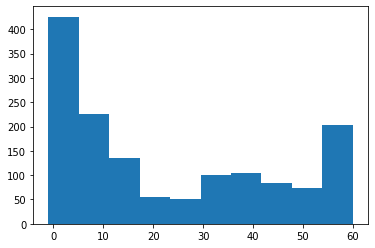

In [10]:
#As for the typical gap between remodel and sale...
plt.hist(df2['RemodelRecency'])
#The recency tends to be extreme, with the single largest of ten classes done in the five years before the sale, and the
#numbers falling off especially harshly after 15, with a significant rise far in the past, 55-60 years ago. 

In [11]:
#As far as correlation goes, there are few strongly correlated variables, either in the positive or negative.
#When it comes to the correlated variables, the predictors of sale price are as expected. There is a strong correlation
#which is positive to sale price with high square footages, with lot area and square footage sticking out.
#Similarly, newer houses have a strong tendency to sell for more money, another intuitively true statement. 
#One odd finding is that a higher condition score is negatively correlated with price. It is possible that that score is 
#structured with one as the highest, however the histogram indicates this is unlikely, as there are no ones and several tens.
df2.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,RemodelRecency
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.022049
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.041968
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014709
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.552570
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.070931
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-0.593868
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.997930
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.127556
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.069814
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,-0.183830


In [12]:
#Notably, Remodel Recency is negatively correlated with SalePrice at 51%, this intuitively follows, as more recently
#remodeled houses have lower scores.

In [13]:
Essential = df2[['SalePrice', 'OverallQual', 'OverallCond','YearBuilt','YearRemodAdd', 'GarageArea','YrSold','RemodelRecency']]
Essential.head()

,SalePrice,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageArea,YrSold,RemodelRecency
0,208500,7,5,2003,2003,548,2008,5
1,181500,6,8,1976,1976,460,2007,31
2,223500,7,5,2001,2002,608,2008,6
3,140000,7,5,1915,1970,642,2006,36
4,250000,8,5,2000,2000,836,2008,8


In [14]:
#Next, add the data for the GDP and Inflation information.
econdata = pd.read_csv(r"C:\Users\Ian's Second PC\Documents\GDPANDINFLATIONDATA.csv")

In [15]:
MinValue = Essential["YrSold"].min()
print(MinValue)

2006


In [16]:
MaxValue = Essential["YrSold"].max()
print(MaxValue)

2010


In [17]:
for i in econdata["Year"]: 
   econdata["Year"] = econdata["Year"].replace(i, i-1)
econdata.head()

,Year,GDP growth (annual %),Inflation %
0,1960,2.3,1.070724
1,1961,6.1,1.198773
2,1962,4.4,1.239669
3,1963,5.8,1.278912
4,1964,6.4,1.585169


In [18]:
Essential2 = pd.merge(Essential, econdata, left_on='YrSold', right_on='Year', how ='left')
Essential2 = Essential2.drop("Year", axis=1)
Essential2.head()

,SalePrice,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageArea,YrSold,RemodelRecency,GDP growth (annual %),Inflation %
0,208500,7,5,2003,2003,548,2008,5,-2.599888,-0.355546
1,181500,6,8,1976,1976,460,2007,31,0.122188,3.839100
2,223500,7,5,2001,2002,608,2008,6,-2.599888,-0.355546
3,140000,7,5,1915,1970,642,2006,36,2.010508,2.852672
4,250000,8,5,2000,2000,836,2008,8,-2.599888,-0.355546


In [19]:
#Next, the model for the data, respecting year sold, must be determined. The test will begin with the heatmap determining
#correlations for the 'Essential' dataframe: 
Essential2.corr()

,SalePrice,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageArea,YrSold,RemodelRecency,GDP growth (annual %),Inflation %
SalePrice,1.000000,0.790982,-0.077856,0.522897,0.507101,0.623431,-0.028923,-0.509079,0.007717,0.032077
OverallQual,0.790982,1.000000,-0.091932,0.572323,0.550684,0.562022,-0.027347,-0.552570,-0.009290,0.000942
OverallCond,-0.077856,-0.091932,1.000000,-0.375983,0.073741,-0.151521,0.043950,-0.070931,-0.090133,-0.061466
YearBuilt,0.522897,0.572323,-0.375983,1.000000,0.592855,0.478954,-0.013618,-0.593868,0.033076,0.036619
YearRemodAdd,0.507101,0.550684,0.073741,0.592855,1.000000,0.371600,0.035743,-0.997930,-0.006717,0.000834
GarageArea,0.623431,0.562022,-0.151521,0.478954,0.371600,1.000000,-0.027378,-0.373447,0.017326,0.016372
YrSold,-0.028923,-0.027347,0.043950,-0.013618,0.035743,-0.027378,1.000000,0.028592,0.094012,-0.280571
RemodelRecency,-0.509079,-0.552570,-0.070931,-0.593868,-0.997930,-0.373447,0.028592,1.000000,0.012767,-0.018887
GDP growth (annual %),0.007717,-0.009290,-0.090133,0.033076,-0.006717,0.017326,0.094012,0.012767,1.000000,0.541448
Inflation %,0.032077,0.000942,-0.061466,0.036619,0.000834,0.016372,-0.280571,-0.018887,0.541448,1.000000


In [20]:
#Of the new variables, the correlation is somewhat low with SalePrice, as GDP Growth represents only 7/10ths of 1%, and 
#inflation is similarly low, at 3% correlated. While the cause of this is not immediately apparent, it may simply be that
#the majority of buyers are purchasing for personal use, and those with the means to purchase a house will not be affected
#by changes in economic conditions to the extent that the situation changes.

In [21]:
#Visualization: 

<AxesSubplot:>

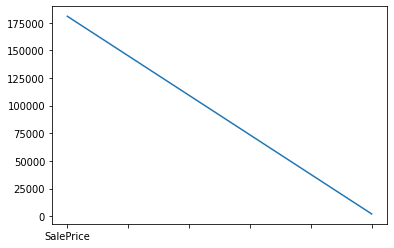

In [22]:
df2pricecheckavg = df2pricecheck.mean()
df2pricecheckavg.plot(x = "YrSold", y ="SalePrice")

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

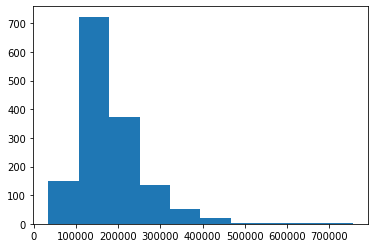

In [23]:
plt.hist(Essential2['SalePrice'])

In [24]:
#Sale Price is distributed heavily on the low end, with the overwhelming majority falling between 100,000 and 200,000 dollars

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

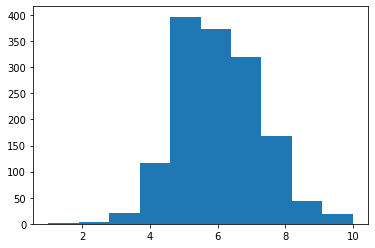

In [25]:
plt.hist(Essential2['OverallQual'])

In [26]:
#Quality is average, with the peak at 5, but high numbers of houses at 6 and 7.

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <BarContainer object of 10 artists>)

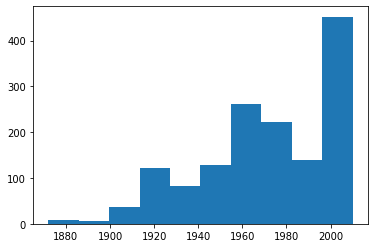

In [27]:
plt.hist(Essential2['YearBuilt'])

In [28]:
#Houses trend overwhelmingly recent, with over half from 1960 or later, and the year 2000 seeing the largest plurality,
#implying a fast-growing market.

(array([220.,  72.,  84., 106.,  98.,  48.,  64., 150., 241., 377.]),
 array([1950., 1956., 1962., 1968., 1974., 1980., 1986., 1992., 1998.,
        2004., 2010.]),
 <BarContainer object of 10 artists>)

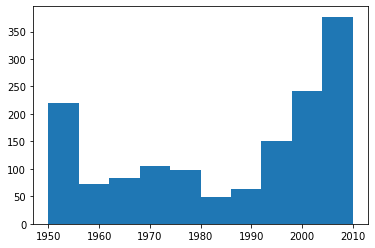

In [29]:
plt.hist(Essential2['YearRemodAdd'])

In [30]:
#Remodels are most commonly done in the past decade, or between 1950 and 1960. This implies some demand for certain aesthetics,
#but that under most circumstances owners and buyers desire more recent technology.

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <BarContainer object of 10 artists>)

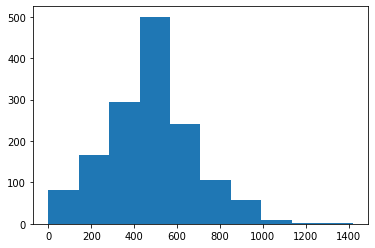

In [31]:
plt.hist(Essential2['GarageArea'])

In [32]:
#Garages tend to be smaller, with the majority under 700 square feet, and only a few above 1000.

(array([314.,   0., 329.,   0.,   0., 304.,   0., 338.,   0., 175.]),
 array([2006. , 2006.4, 2006.8, 2007.2, 2007.6, 2008. , 2008.4, 2008.8,
        2009.2, 2009.6, 2010. ]),
 <BarContainer object of 10 artists>)

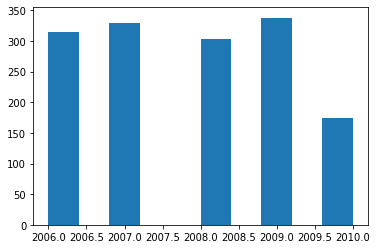

In [33]:
plt.hist(Essential2['YrSold'])

In [34]:
#Sales drop off entirely in the final six months of 2007, implying that the real estate market's downturn in that period
#affected the local market in Ames as well.

(array([426., 225., 135.,  56.,  52., 101., 104.,  83.,  74., 204.]),
 array([-1. ,  5.1, 11.2, 17.3, 23.4, 29.5, 35.6, 41.7, 47.8, 53.9, 60. ]),
 <BarContainer object of 10 artists>)

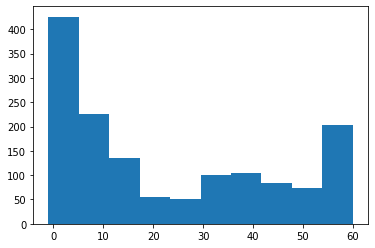

In [35]:
plt.hist(Essential2['RemodelRecency'])

In [36]:
#The recency score tends toward extremely recent remodels, implying that remodeling prior to selling is a common
#practice. 

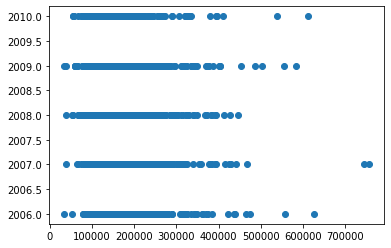

In [37]:
plt.scatter(Essential2['SalePrice'],Essential2["YrSold"])

In [38]:
#Cost is tighter in distribution over time, with the very low cost and very high cost sales both disappearing between 2006
#and 2010, most likely due to the economic downturn making it harder to find cheaper housing, and consumer suspicion of 
#more costly options.

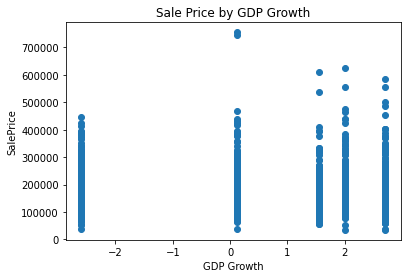

In [39]:
plt.scatter(Essential2['GDP growth (annual %)'], Essential2['SalePrice']) 
plt.xlabel("GDP Growth")  # add X-axis label 
plt.ylabel("SalePrice")  # add Y-axis label 
plt.title("Sale Price by GDP Growth")  # add title 
plt.show()

In [40]:
#Prices fell harshly during economic downturn as well, as is to be expected.

In [41]:
#As for models, an attempt will be made at using machine learning to forecast the future trends in price, with a simple 
#training and testing set. 

In [42]:
scaler = preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(Essential)
scaled_df = pd.DataFrame(scaled_df)

In [43]:
# Subsetting our data into our dependent and independent variables.
Essential_train = Essential2[Essential2['YrSold'].isin([2006,2007,2008])]
X_train = Essential_train.drop(['SalePrice'],axis=1)
y_train = Essential_train['SalePrice']
Essential_test = Essential2[Essential2['YrSold'].isin([2009,2010])]
X_test= Essential_test.drop(['SalePrice'],axis=1)
y_test = Essential_test['SalePrice']

In [44]:
#The first model to test for predictive power is the Random Forest Model, with a thorough examination of Bayesian possibility,
#this model may provide insights a more linear approach could miss.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_train_scaled)
y_pred_prob = model_res.predict_proba(X_train_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_train, y_pred)

In [45]:
from sklearn.ensemble import RandomForestRegressor
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [46]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [47]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.726173981841617


In [48]:
predictions = regressor.predict(X_test)
rmse(y_test, predictions)

42048.81949495116

In [49]:
RFResults = regressor.fit(X_test, y_test)
ResultOobScore = RFResults.oob_score_
print(f'Out-of-Bag Score: {ResultOobScore}')

Out-of-Bag Score: 0.7441518730242724


In [50]:
#This is an excellent result, the score explains variation even more strongly than before, and with a substantially smaller
#RMSE compared to the linear model, the Random Forest emerges as a clear predictive winner.

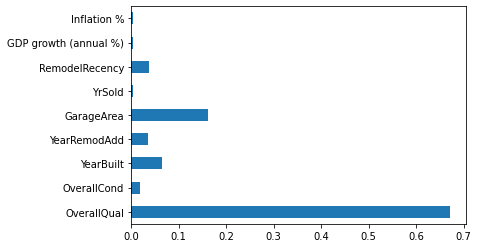

In [51]:
Importance = pd.Series(RFResults.feature_importances_, index = X_test.columns,name="Importance")
SortChart = Importance.plot(kind="barh")

In [52]:
RFResults.feature_importances_

array([0.6712426 , 0.01791278, 0.06600731, 0.03494507, 0.16218881,
       0.00363626, 0.03758721, 0.00331259, 0.00316736])

In [53]:
#While less impactful, the Random Forest Model illustrates similar trends to the linear model over the same data.
#While inflation and GDP are found to have no impact in this model at all, nor year sold, the Garage area, year remodel added
#and overall quality remain strong predictors. Notably, this model argues for a very similar impact for Remodel Recency
#and Year Remodel added, a coefficient of .038 to one of .037. This is likely due to the strong correlation between the two. 

In [54]:
from sklearn import linear_model, preprocessing 
rModel = linear_model.LinearRegression(normalize=True)

In [58]:
LinearRegressor = rModel.fit(X_train, y_train)

In [65]:
LinearPredict = LinearRegressor.predict(X_test)
LinearRMSE = rmse(y_test, LinearPredict)
print(LinearRMSE)
#LinearRMSE = rmse(y_test, y_pred)
#print(LinearRMSE)

5925909562418638.0


In [62]:
import statsmodels.api as sm 
rModel2 = sm.OLS(y_train, X_train) 
rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     270.5
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          4.01e-220
Time:                        23:47:57   Log-Likelihood:                -11497.
No. Observations:                 947   AIC:                         2.301e+04
Df Residuals:                     939   BIC:                         2.305e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
OverallQual            3.504e+04   1475.641     23.748      0.000    3.21e+04    3.79e+04
OverallCond            3606.3353   1647.247      2.189      0.029     373.624    6839.047
YearBuilt                95.3448     76.984      1.238      0.216     -55.736     246.426
YearRemodAdd             19.2468     53.162      0.362      0.717     -85.082     123.576
GarageArea               93.7236      8.321     11.264      0.000      77.394     110.053
YrSold                 -160.8916     42.858     -3.754      0.000    -245.000     -76.783
RemodelRecency         -180.1384     57.357     -3.141      0.002    -292.702     -67.575
GDP growth (annual %)  -314.9657   1298.585     -0.243      0.808   -2863.430    2233.499
Inflation %            1658.8283   1360.126      1.220      0.223   -1010.410    4328.067
==============================================================================
Omnibus:                      493.606   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9102.576
Skew:                           1.946   Prob(JB):                         0.00
Kurtosis:                      17.681   Cond. No.                     2.38e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#The linear model proves significantly less accurate than its random forest counterpart, although the variables are 
#more impactful on the dependent variable. The highest predictors are once again Overall Quality and Garage Area, and are
#joined by inflation, though the last is not statistically significant even at an 80% confidence interval. Also notable is
#the RemodelRecency variable, which matches the predictions of the original project. It is a similarly powerful predictor in
#the more accurate random forest model. The Random Forest also shows a stronger explanatory power with an RMSE orders of
#magnitude smaller, with remarkably similar impacts for the independent variables. Ultimately, the OverallQuality wins out
#in both models, however the 67% increase in the sale price reported in the Random Forest Model predicted for a single point
#in overall quality is accurate to a point of only $42048.82, compared to the linear model's $5925909562418638.